In [21]:
import os, sys
import torch
import matplotlib.pyplot as plt

dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
dir0 = os.path.dirname(dir1)  # One level above dir1

plt.rcParams.update({
    'figure.dpi': 600,
    'axes.labelsize': 30.0,
    'axes.titlesize': 30.0,
    'axes.labelweight': 'normal',
    'axes.linewidth': 1.25,
    'legend.fontsize': 25,
    'legend.title_fontsize': 18.0,
    'xtick.labelsize': 30,
    'ytick.labelsize': 30,
    'lines.linewidth': 2.0,
    'lines.markersize': 6.0,
    'grid.color': '.8',
    'grid.linestyle': '-',
    'grid.linewidth': 1.0,
})

if dir1 not in sys.path: sys.path.append(dir0)

from src.config import PPOConfig
from src.utils import ExperimentUtils

/var/folders/jk/p6ztnrh56hd0d6495g9sg_nh0000gn/T/ipykernel_12967/2289525479.py:30: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring this parameter.
  plt.style.use(ExperimentUtils.get_plt_params())
/var/folders/jk/p6ztnrh56hd0d6495g9sg_nh0000gn/T/ipykernel_12967/2289525479.py:30: UserWarning: Style includes a parameter, 'backend_fallback', that is not related to style.  Ignoring this parameter.
  plt.style.use(ExperimentUtils.get_plt_params())
/var/folders/jk/p6ztnrh56hd0d6495g9sg_nh0000gn/T/ipykernel_12967/2289525479.py:30: UserWarning: Style includes a parameter, 'date.epoch', that is not related to style.  Ignoring this parameter.
  plt.style.use(ExperimentUtils.get_plt_params())
/var/folders/jk/p6ztnrh56hd0d6495g9sg_nh0000gn/T/ipykernel_12967/2289525479.py:30: UserWarning: Style includes a parameter, 'docstring.hardcopy', that is not related to style.  Ignoring this parameter.
  plt.style.use(ExperimentUtils.get_plt_params())
/var/folders/

In [22]:
# helper methods
def csv_file_to_df(dir, filename):
    suite = ExperimentUtils(path=str(dir+filename))
    return suite.df

def get_strategy(name):
    if 'mlp_global' in name:
        return 'MLP_GLOBAL'
    elif 'mlp_local' in name:
        return 'MLP_LOCAL'
    elif 'mlp' in name:
        return 'MLP'
    else:
        raise ValueError('Unknown strategy ' + file_make_up)

def get_depth(name):
    if '1' in name:
        return 1
    elif '2' in name:
        return 2
    elif 'none' in name:
        return 0
    else:
        raise ValueError('Unknown depth ' + file_make_up)

In [23]:
csv_dir = 'saved_experiments/'

list_of_filenames_to_process = [
    'mlp_depth_none.csv',
    'mlp_depth_1.csv',
    'mlp_depth_2.csv',
    'mlp_local_depth_none.csv',
    'mlp_local_depth_1.csv',
    'mlp_local_depth_2.csv',
    'mlp_global_depth_none.csv',
    'mlp_global_depth_1.csv',
    'mlp_global_depth_2.csv',
]

df = pd.DataFrame()

for file in list_of_filenames_to_process:
    file_make_up = file.split('.')[0]

    df_file = csv_file_to_df(csv_dir, file)
    df_file['strategy'] = get_strategy(file_make_up)
    df_file['depth'] = get_depth(file_make_up)
    if get_depth(file_make_up) == 0:
        df_file['name'] = 'embedding_num_cells = 0'
    kpi_df = pd.json_normalize(df_file['kpi']) # Normalize the dictionaries into separate columns
    df_file = pd.concat([df_file.drop(columns=['kpi']), kpi_df], axis=1)
    df = df.append(df_file)

df = df.rename(columns={'name': 'embedding_number'})
df["embedding_number"] = df["embedding_number"].str.extract(r"(\d+)", expand=False).astype(int)


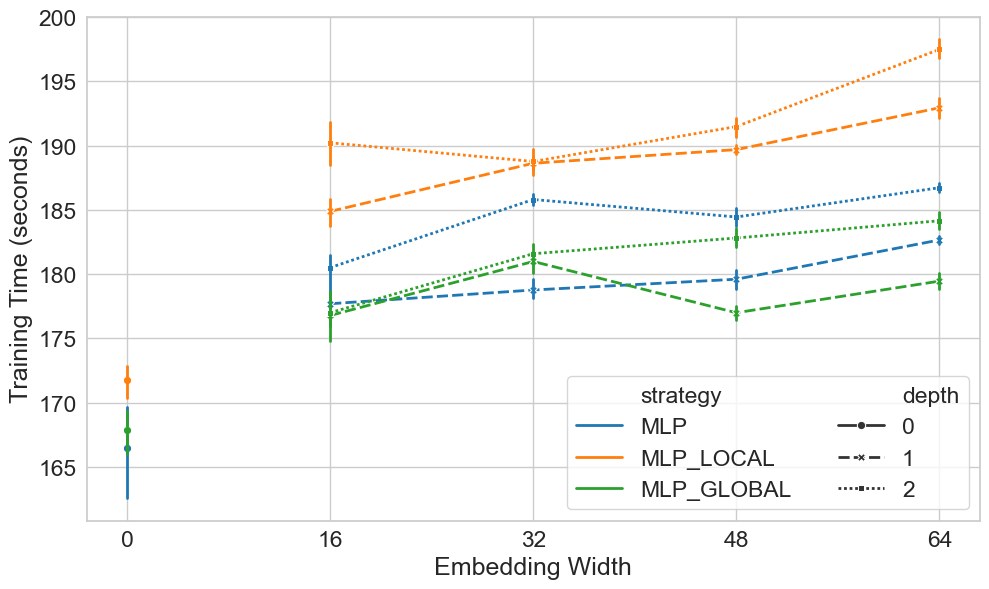

In [29]:
# Assuming your DataFrame is named df
# Group by strategy, depth, and embedding number and calculate mean and std
summary = df.groupby(['strategy', 'depth', 'embedding_number'])['training_time'].agg(['mean', 'std']).reset_index()

# Rename columns for convenience
summary.columns = ['strategy', 'depth', 'embedding_number', 'mean_training_time', 'std_training_time']

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x='embedding_number',
    y='training_time',
    hue='strategy',
    style='depth',
    markers=True,
    dashes=True,
    err_style='bars',
    linewidth=2,
    estimator='mean',
    errorbar=('ci', 90)
)
custom_ticks = df['embedding_number'].unique()
plt.xticks(custom_ticks)
plt.xlabel('Embedding Width')
plt.ylabel('Training Time (seconds)')
plt.grid(True)
plt.tight_layout()
plt.legend(loc='lower right', ncol=2)
plt.show()
